In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending_travel,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,
2010,1197000.0,532000.0,665000.0,1.040000e+09,0,0,0.000000,2010
2011,1187000.0,568000.0,619000.0,9.700000e+08,0,0,0.000000,2011
2012,1053000.0,536000.0,517000.0,9.300000e+08,0,0,0.000000,2012
2013,1079000.0,509000.0,570000.0,9.700000e+08,0,0,0.000000,2013
2014,1079000.0,521000.0,558000.0,8.900000e+08,0,0,0.000000,2014
2015,1179000.0,592000.0,587000.0,9.500000e+08,0,0,0.000000,2015
2016,1227000.0,632000.0,595000.0,1.040000e+09,0,0,0.000000,2016
2017,1345000.0,664000.0,681000.0,1.080000e+09,0,0,0.000000,2017
2018,1356000.0,680000.0,676000.0,1.120000e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -658733 ± 158836 (95% confidence)


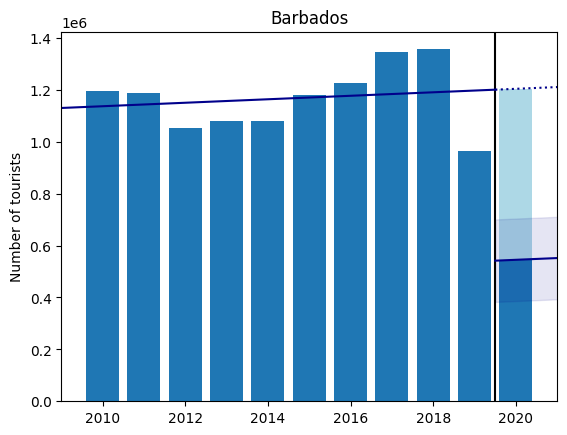

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     20.23
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           0.000743
Time:                        03:22:44   Log-Likelihood:                 10.079
No. Observations:                  11   AIC:                            -14.16
Df Residuals:                       8   BIC:                            -12.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.4172     25.172      0.215

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [2]:
# Set up plot
plt.title('Barbados')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -428133 ± 69359 (95% confidence)


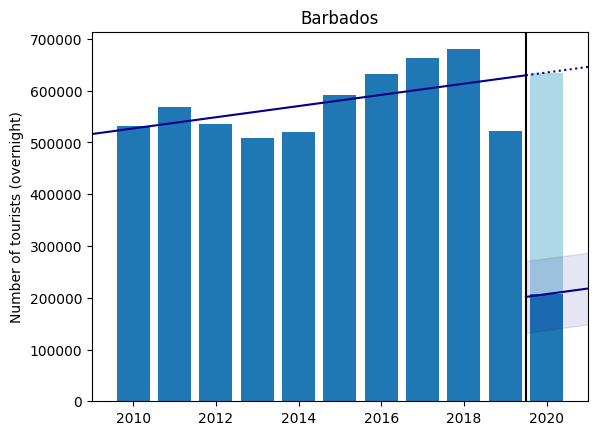

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.927
Model:                              OLS   Adj. R-squared:                  0.908
Method:                   Least Squares   F-statistic:                     50.46
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           2.91e-05
Time:                          03:23:00   Log-Likelihood:                 11.702
No. Observations:                    11   AIC:                            -17.40
Df Residuals:                         8   BIC:                            -16.21
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.8083  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Set up plot
plt.title('Barbados')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -230600 ± 94921 (95% confidence)


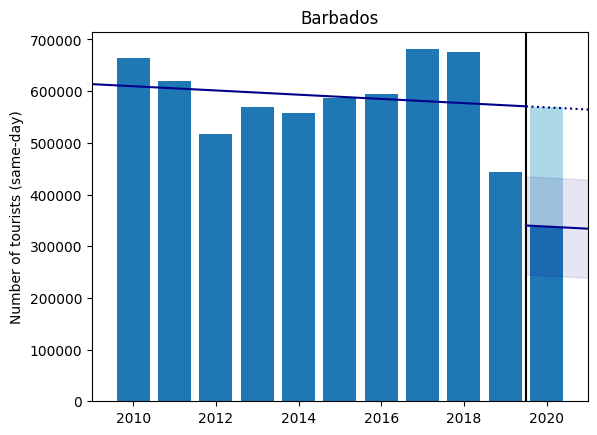

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.649
Model:                              OLS   Adj. R-squared:                  0.562
Method:                   Least Squares   F-statistic:                     7.412
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):             0.0151
Time:                          03:23:20   Log-Likelihood:                 7.9173
No. Observations:                    11   AIC:                            -9.835
Df Residuals:                         8   BIC:                            -8.641
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.3796  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Barbados')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -576000000 ± 99976663 (95% confidence)


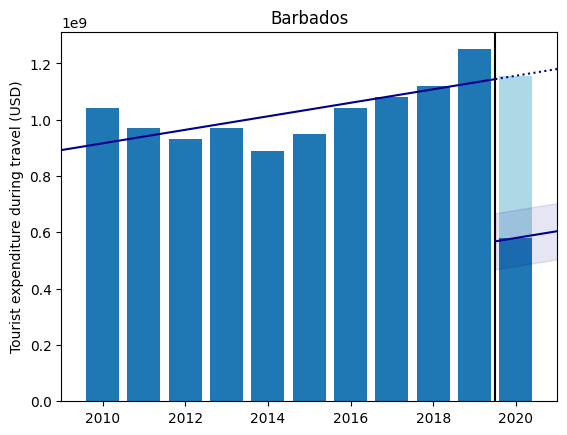

                                OLS Regression Results                                
Dep. Variable:     log_inbtou_spending_travel   R-squared:                       0.868
Model:                                    OLS   Adj. R-squared:                  0.835
Method:                         Least Squares   F-statistic:                     26.29
Date:                        Wed, 26 Apr 2023   Prob (F-statistic):           0.000304
Time:                                03:23:53   Log-Likelihood:                 14.033
No. Observations:                          11   AIC:                            -22.07
Df Residuals:                               8   BIC:                            -20.87
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# Set up plot
plt.title('Barbados')
plt.ylabel('Tourist expenditure during travel (USD)')
plt.xlim(2009, 2021)
y_name = 'inbtou_spending_travel'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)